<a href="https://colab.research.google.com/github/juanchoguillo/S6TC1-Redes_Neuronales/blob/main/S6TC1_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


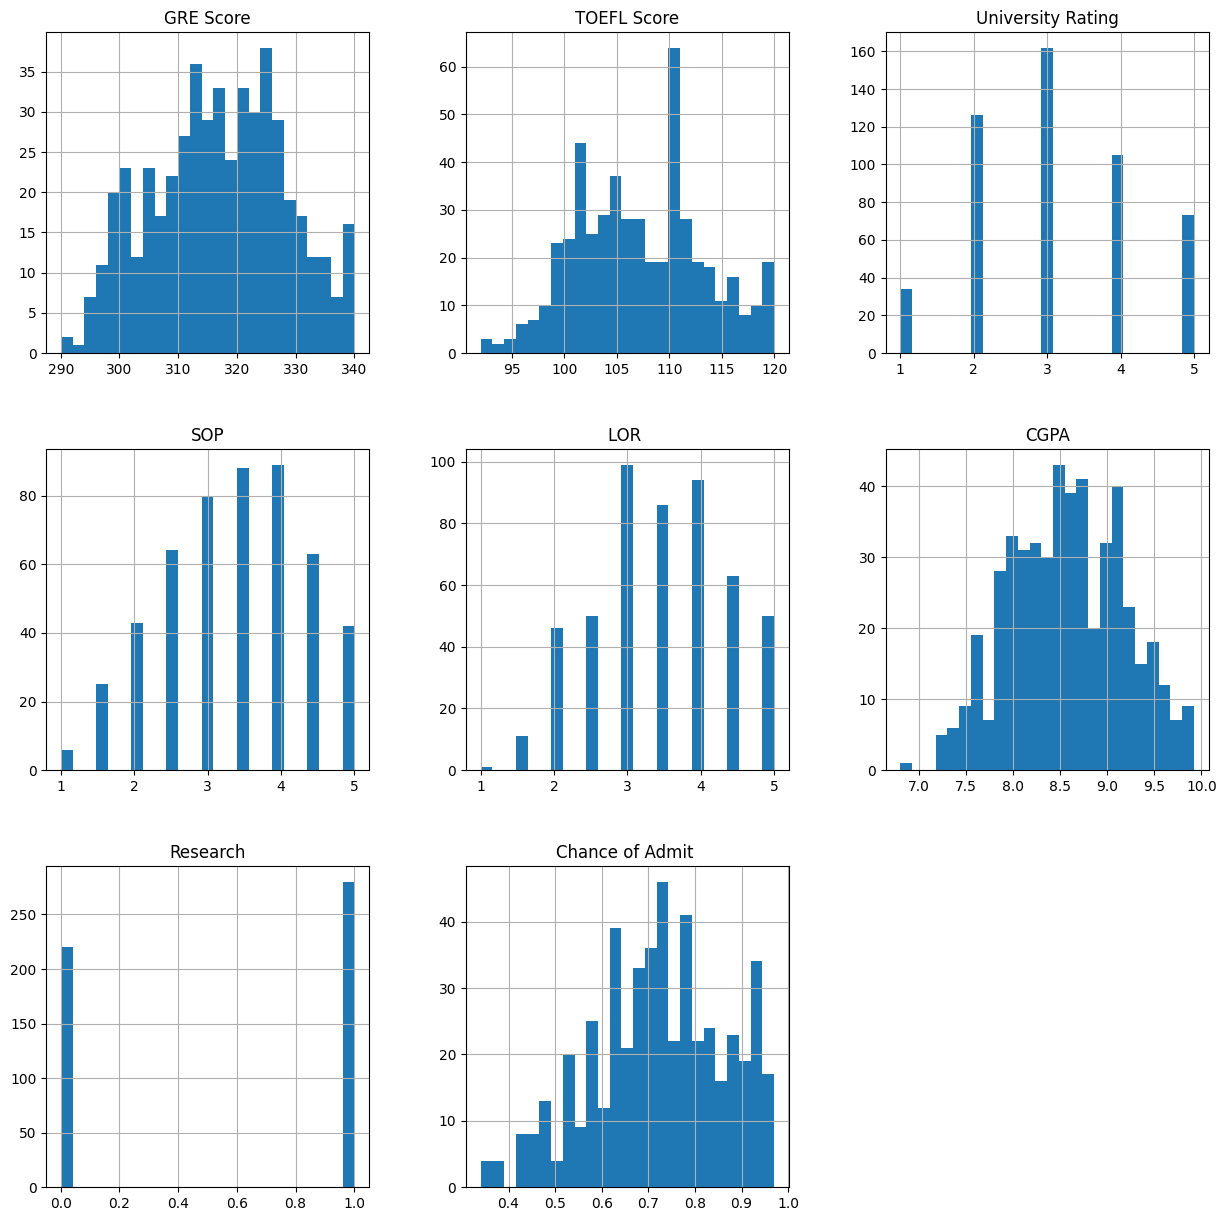

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(data[data.columns[-1]])

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [ ]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts


In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model1 = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model1.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer='sgd', loss='mean_squared_error')

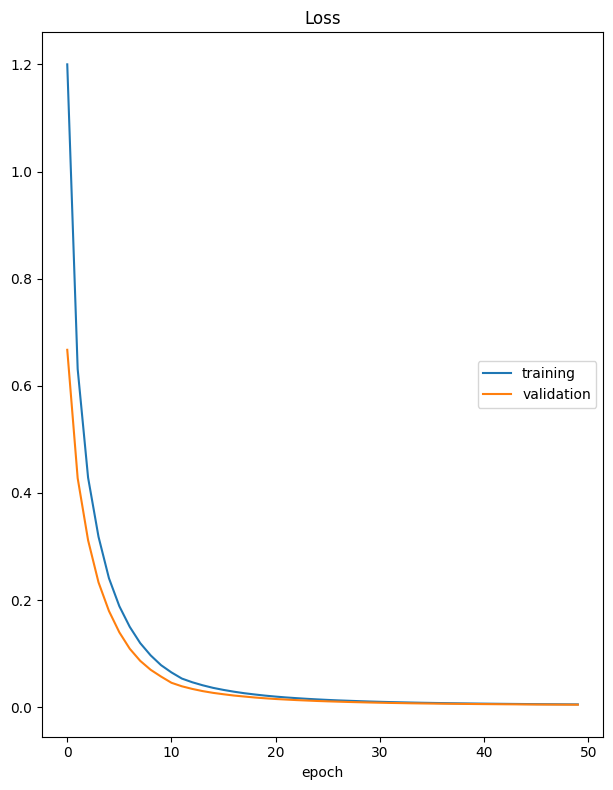

Loss
	training         	 (min:    0.005, max:    1.200, cur:    0.005)
	validation       	 (min:    0.005, max:    0.667, cur:    0.005)
10/10 [==============================] - 0s 49ms/step - loss: 0.0052 - val_loss: 0.0046


In [ ]:
model1.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
pred1 = model1.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
#MSE y MAE
mse1 = keras.metrics.mean_squared_error(Y_test, pred1).numpy().mean()
print(f"MSE: {mse1}")
mae1 = keras.metrics.mean_absolute_error(Y_test, pred1).numpy().mean()
print(f"MAE: {mae1}")

MSE: 0.004645010456442833
MAE: 0.04962023347616196


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model2.add(Dense(256, input_shape=(dims,),activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(output_var))
model2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

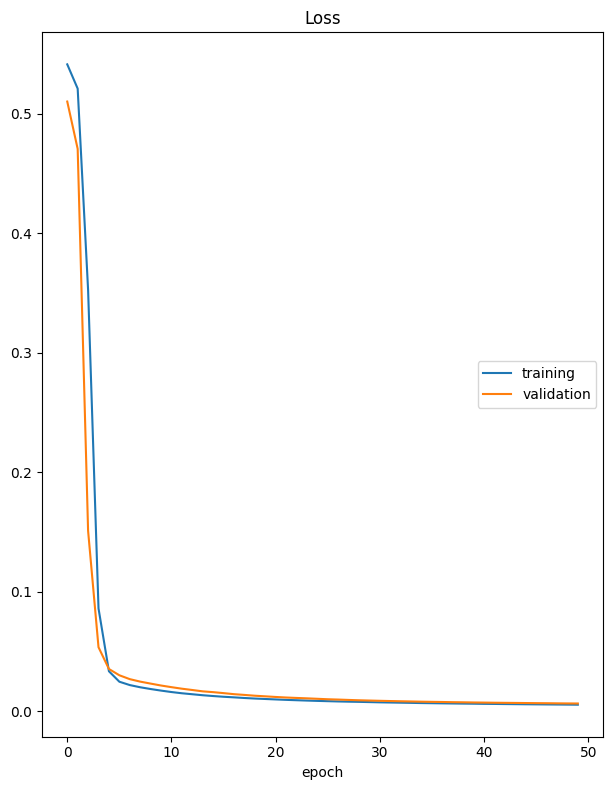

Loss
	training         	 (min:    0.005, max:    0.541, cur:    0.005)
	validation       	 (min:    0.006, max:    0.510, cur:    0.006)
8/8 [==============================] - 0s 41ms/step - loss: 0.0055 - val_loss: 0.0065


In [ ]:
model2.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

In [ ]:
pred2 = model2.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
#MSE y MAE
mse2 = keras.metrics.mean_squared_error(Y_test, pred2).numpy().mean()
print(f"MSE: {mse2}")
mae2 = keras.metrics.mean_absolute_error(Y_test, pred2).numpy().mean()
print(f"MAE: {mae2}")

MSE: 0.5258177518844604
MAE: 0.7102922797203064


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
K.clear_session()

# Definición red neuronal con la función Sequential()
model3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model3.add(Dense(256, input_shape=(dims,),activation='relu'))
model3.add(Dense(256,activation='relu'))
model3.add(Dense(output_var))
model3.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [ ]:
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [ ]:
model3.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model3.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
2/2 [==============================] - 0s 175ms/step - loss: 0.3830 - val_loss: 0.2706
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 0.2488 - val_loss: 0.1754
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.1609 - val_loss: 0.1222
Epoch 4/50
2/2 [==============================] - 0s 72ms/step - loss: 0.1109 - val_loss: 0.0930
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0826 - val_loss: 0.0768
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0665 - val_loss: 0.0675
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0570 - val_loss: 0.0619
Epoch 8/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0511 - val_loss: 0.0584
Epoch 9/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0475 - val_loss: 0.0558
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0448 - val_loss: 0.0537
Epoch 11/50
2/2 [===========

In [ ]:
pred3 = model3.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
#MSE y MAE
mse3 = keras.metrics.mean_squared_error(Y_test, pred3).numpy().mean()
print(f"MSE: {mse3}")
mae3 = keras.metrics.mean_absolute_error(Y_test, pred3).numpy().mean()
print(f"MAE: {mae3}")

MSE: 0.01939164660871029
MAE: 0.10995017737150192


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

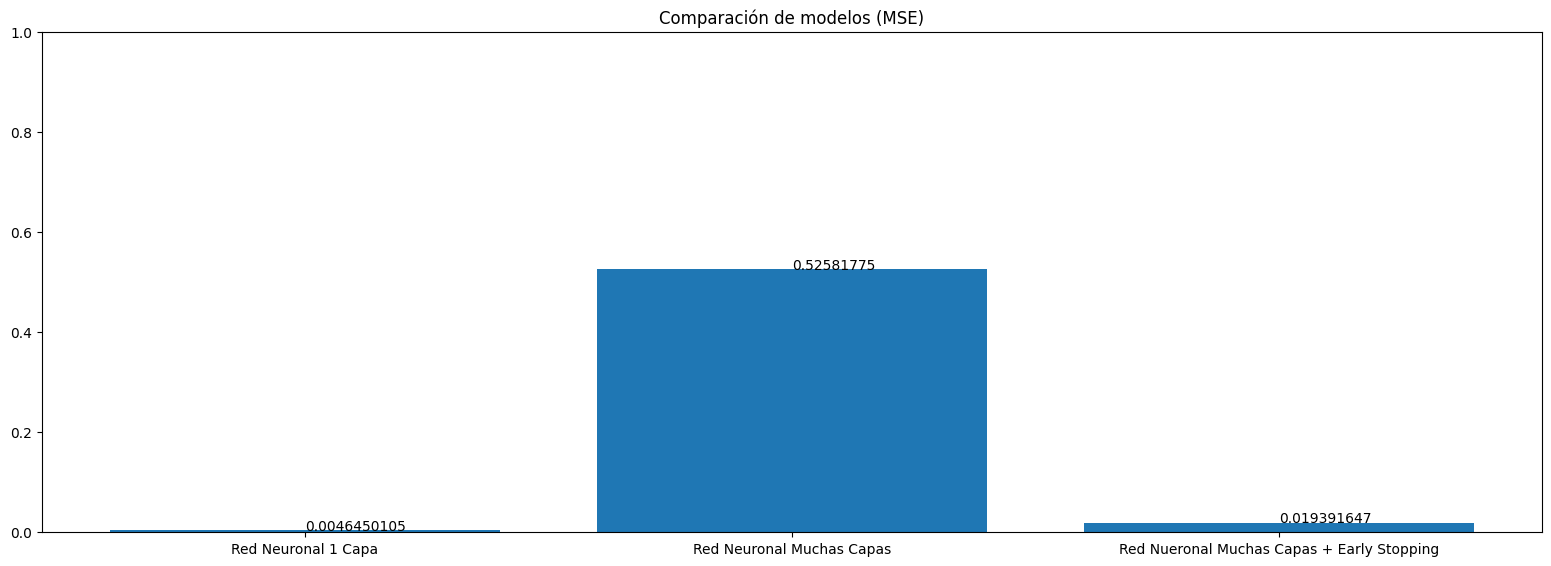

In [ ]:
# MSE
fig = plt.figure(figsize=[15, 5])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos (MSE)")
ax.set_ylim(bottom=0, top=1)
ejeX = ['Red Neuronal 1 Capa','Red Neuronal Muchas Capas' ,'Red Nueronal Muchas Capas + Early Stopping']
ejeY = [mse1, mse2, mse3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

El gráfico resultante muestra tres barras que representan los valores de MSE para cada modelo. Aquí está el análisis y las conclusiones con respecto a los distintos modelos:

1. Red Neuronal de 1 Capa:
   - MSE: 0.0047

Este modelo tiene el MSE más bajo de los tres, lo que indica un buen rendimiento en la tarea para la que fue entrenado. Su bajo valor de MSE sugiere que la red neuronal de 1 capa puede ajustarse bien a los datos y hacer predicciones precisas.

2. Red Neuronal con Muchas Capas:
   - MSE: 0.5258

La red neuronal con muchas capas muestra un MSE significativamente más alto en comparación con la red neuronal de 1 capa. Esto sugiere que el modelo puede estar sufriendo de sobreajuste (overfitting), lo que significa que se ha ajustado demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. Es posible que se requieran técnicas adicionales, como regularización o dropout, para mejorar su rendimiento.

3. Red Neuronal con Muchas Capas y Early Stopping:
   - MSE: 0.01099

Este modelo tiene un MSE intermedio entre la red neuronal de 1 capa y la red neuronal con muchas capas. La incorporación de early stopping ha ayudado a evitar el sobreajuste al detener el entrenamiento antes de que el modelo comience a ajustarse demasiado a los datos de entrenamiento. Aunque su MSE es mayor que el de la red neuronal de 1 capa, es considerablemente menor que el de la red neuronal con muchas capas, lo que indica que logra un equilibrio entre el ajuste y la generalización.

En resumen, la red neuronal de 1 capa muestra el mejor rendimiento en términos de MSE, seguida de la red neuronal con muchas capas y early stopping. La red neuronal con muchas capas parece sufrir de sobreajuste, lo que sugiere que se necesitan ajustes adicionales para mejorar su rendimiento. La elección del modelo depende de los objetivos y restricciones del problema, pero en general, es importante encontrar un equilibrio entre el ajuste y la generalización para obtener el mejor rendimiento en tareas de aprendizaje automático.

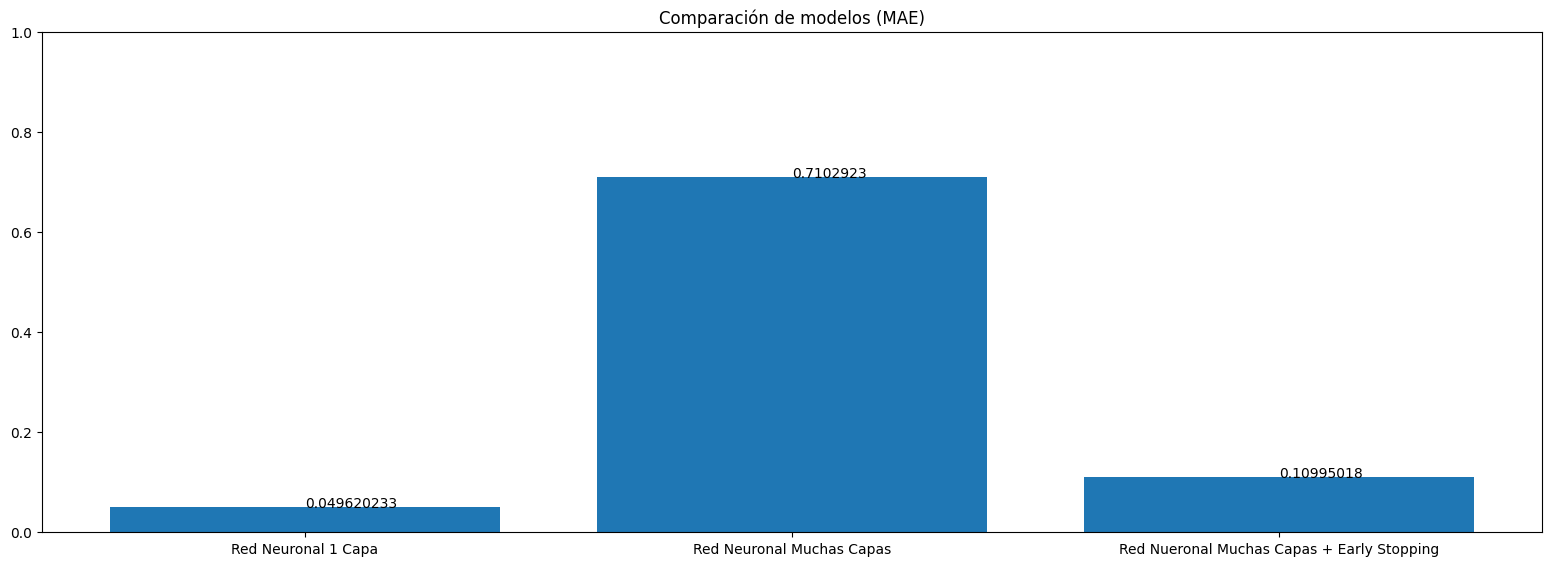

In [ ]:
# MAE
fig = plt.figure(figsize=[15, 5])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos (MAE)")
ax.set_ylim(bottom=0, top=1)
ejeX = ['Red Neuronal 1 Capa','Red Neuronal Muchas Capas' ,'Red Nueronal Muchas Capas + Early Stopping']
ejeY = [mae1, mae2, mae3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Aqui podemos conlucir lo siguiente

1. Red Neuronal de 1 Capa:
   - MAE: 0.0496

Al igual que en el análisis anterior, la red neuronal de 1 capa muestra el mejor rendimiento en términos de error. Un valor de MAE bajo indica que este modelo tiene una buena capacidad para hacer predicciones precisas, en promedio, y ajustarse bien a los datos.

2. Red Neuronal con Muchas Capas:
   - MAE: 0.7103

La red neuronal con muchas capas muestra un MAE significativamente más alto en comparación con la red neuronal de 1 capa. Esto sugiere que el modelo puede estar sufriendo de sobreajuste y no generaliza bien a nuevos datos. Al igual que antes, se podrían aplicar técnicas de regularización o dropout para mejorar su rendimiento.

3. Red Neuronal con Muchas Capas y Early Stopping:
   - MAE: 0.1099

Al igual que en el análisis anterior, la incorporación de early stopping ha ayudado a mejorar el rendimiento del modelo con muchas capas. Aunque su MAE es mayor que el de la red neuronal de 1 capa, es considerablemente menor que el de la red neuronal con muchas capas sin early stopping. Esto indica que el modelo con muchas capas y early stopping logra un equilibrio entre el ajuste y la generalización, obteniendo predicciones más precisas que el modelo con muchas capas.

En resumen, el modelo de red neuronal de 1 capa muestra el mejor rendimiento en términos de MAE, seguido del modelo con muchas capas y early stopping. El modelo con muchas capas muestra un rendimiento inferior debido al sobreajuste, mientras que el modelo con muchas capas y early stopping logra un equilibrio mejorado entre ajuste y generalización. Al igual que antes, la elección del modelo dependerá de los objetivos y restricciones específicas del problema.